Naive Bayes Model:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

SVM Model:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/l

Best parameters: {'C': 0.1, 'kernel': 'linear'}

Best SVM Model:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


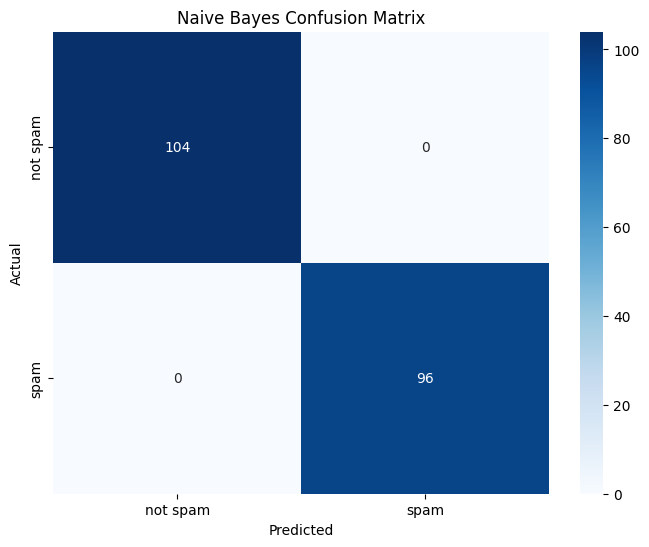

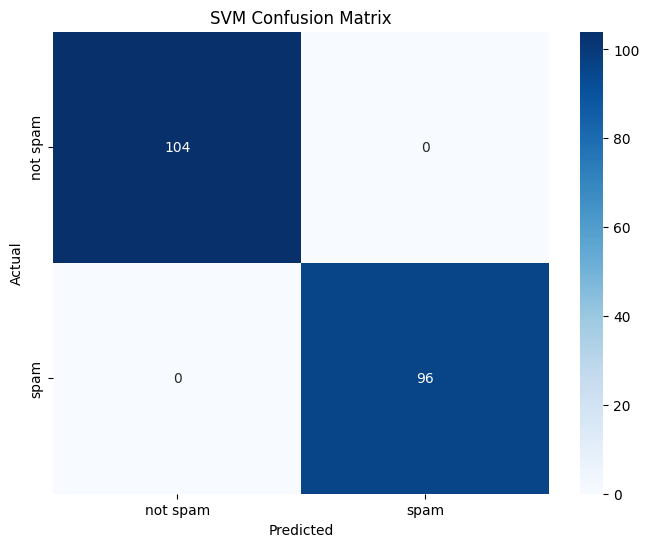

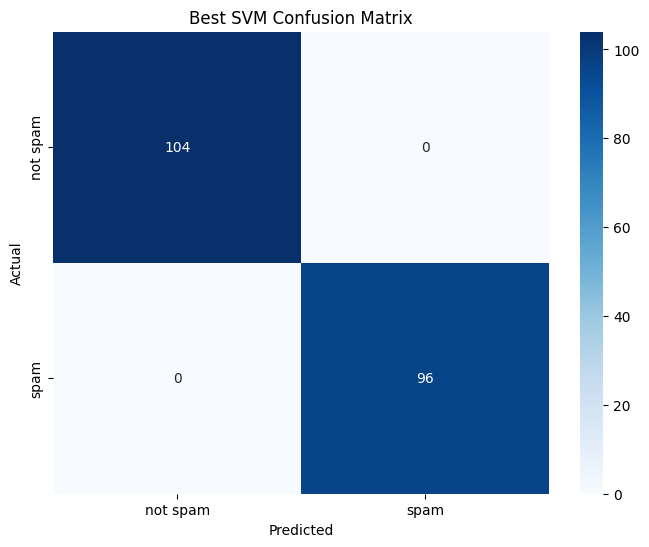

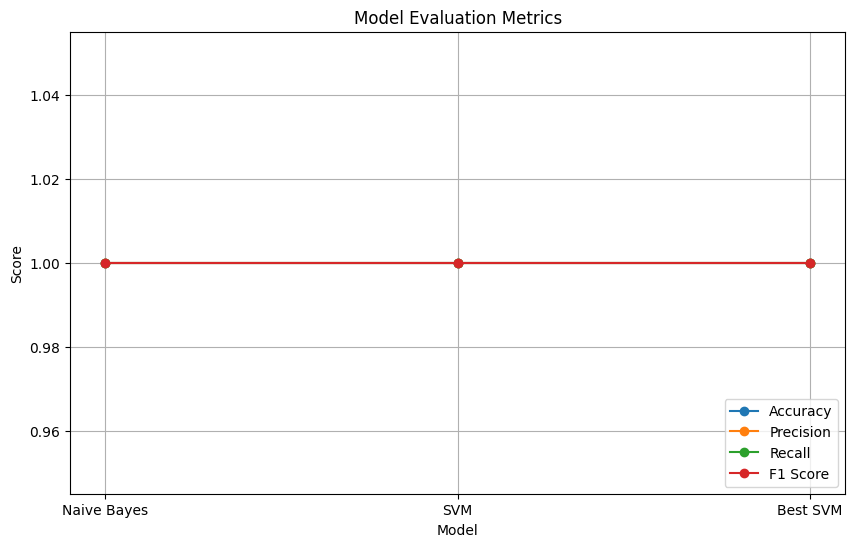

Overall Accuracy of the Best SVM Model: 1.0


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the synthetic dataset
df = pd.read_csv('synthetic_emails.csv')

# Function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove whitespaces
    text = text.strip()
    return text

# Apply preprocessing to the email column
df['cleaned_email'] = df['email'].apply(preprocess_text)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=3000) # You can adjust max_features

# Fit and transform the cleaned email text
X = vectorizer.fit_transform(df['cleaned_email'])

# Extract labels
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
nb_model = MultinomialNB()
svm_model = SVC(kernel='linear', C=1, probability=True)

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Evaluate the Naive Bayes model
nb_predictions = nb_model.predict(X_test)
print("Naive Bayes Model:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Precision:", precision_score(y_test, nb_predictions, pos_label='spam'))
print("Recall:", recall_score(y_test, nb_predictions, pos_label='spam'))
print("F1 Score:", f1_score(y_test, nb_predictions, pos_label='spam'))

# Evaluate the SVM model
svm_predictions = svm_model.predict(X_test)
print("\nSVM Model:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions, pos_label='spam'))
print("Recall:", recall_score(y_test, svm_predictions, pos_label='spam'))
print("F1 Score:", f1_score(y_test, svm_predictions, pos_label='spam'))

# Fine-Tuning SVM Model using GridSearchCV
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the model with best parameters
best_svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'])
best_svm_model.fit(X_train, y_train)

# Evaluate the best model
best_svm_predictions = best_svm_model.predict(X_test)
print("\nBest SVM Model:")
print("Accuracy:", accuracy_score(y_test, best_svm_predictions))
print("Precision:", precision_score(y_test, best_svm_predictions, pos_label='spam'))
print("Recall:", recall_score(y_test, best_svm_predictions, pos_label='spam'))
print("F1 Score:", f1_score(y_test, best_svm_predictions, pos_label='spam'))

# Plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['not spam', 'spam'], yticklabels=['not spam', 'spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Confusion matrix for Naive Bayes model
nb_cm = confusion_matrix(y_test, nb_predictions)
plot_confusion_matrix(nb_cm, "Naive Bayes Confusion Matrix")

# Confusion matrix for SVM model
svm_cm = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(svm_cm, "SVM Confusion Matrix")

# Confusion matrix for best SVM model
best_svm_cm = confusion_matrix(y_test, best_svm_predictions)
plot_confusion_matrix(best_svm_cm, "Best SVM Confusion Matrix")

# Plot evaluation metrics
metrics = {
    "Model": ["Naive Bayes", "SVM", "Best SVM"],
    "Accuracy": [
        accuracy_score(y_test, nb_predictions),
        accuracy_score(y_test, svm_predictions),
        accuracy_score(y_test, best_svm_predictions)
    ],
    "Precision": [
        precision_score(y_test, nb_predictions, pos_label='spam'),
        precision_score(y_test, svm_predictions, pos_label='spam'),
        precision_score(y_test, best_svm_predictions, pos_label='spam')
    ],
    "Recall": [
        recall_score(y_test, nb_predictions, pos_label='spam'),
        recall_score(y_test, svm_predictions, pos_label='spam'),
        recall_score(y_test, best_svm_predictions, pos_label='spam')
    ],
    "F1 Score": [
        f1_score(y_test, nb_predictions, pos_label='spam'),
        f1_score(y_test, svm_predictions, pos_label='spam'),
        f1_score(y_test, best_svm_predictions, pos_label='spam')
    ]
}

metrics_df = pd.DataFrame(metrics)
metrics_df.set_index("Model", inplace=True)

# Plotting the metrics as a line plot
plt.figure(figsize=(10, 6))
for metric in metrics_df.columns:
    plt.plot(metrics_df.index, metrics_df[metric], marker='o', label=metric)

plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print overall accuracy of the final best model
accuracy = accuracy_score(y_test, best_svm_predictions)
print(f"Overall Accuracy of the Best SVM Model: {accuracy}")
